In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  ''' A Convolutional Neural Network (CNN) is a deep learning model that recognizes patterns in images. 
####  It consists of convolutional layers (detect features like edges and shapes), activation functions (keep important details), 
####  pooling layers (reduce size while retaining key information), stride (controls how the filter moves), 
#### and fully connected layers (make final predictions). CNNs help computers "see" and classify images, 
#### like how our brain recognizes faces! '''

In [3]:
# loading th mnist dataset 

from tensorflow.keras.datasets import mnist

In [16]:
(X_train, y_train),(X_test,y_test) =  mnist.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
y_test.shape

(10000,)

In [21]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

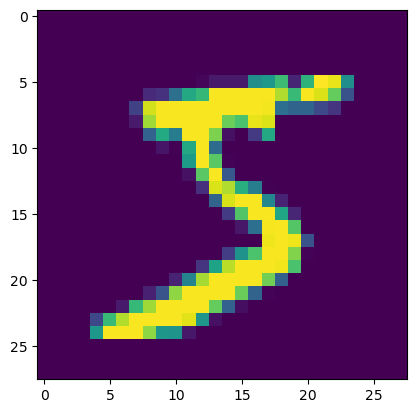

In [22]:
# using matplotlib imshow to display a gray scale image 

plt.imshow(X_train[0])

In [25]:
y_train[0]

5

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# converting the y_train and y_test values to categories 
y_train.shape

(60000,)

In [30]:
y_cat_test = to_categorical(y_test, num_classes=10)

y_cat_train = to_categorical(y_train, num_classes=10)


In [31]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [32]:
y_cat_test.shape

(10000, 10)

In [33]:
y_cat_train.shape

(60000, 10)

In [35]:
# Normalizing the data or scaling the data
X_train.max()

255

In [36]:
X_train.min()

0

In [37]:
# now here is the part for scaling since we know the values are lies between 0 to 255 we can divide the each value by 255 to the
# values in between 0 and 1 and also the future images are of colors between rgb are also between 0 to 255 and i will not change.

X_train = X_train/255
X_test = X_test / 255

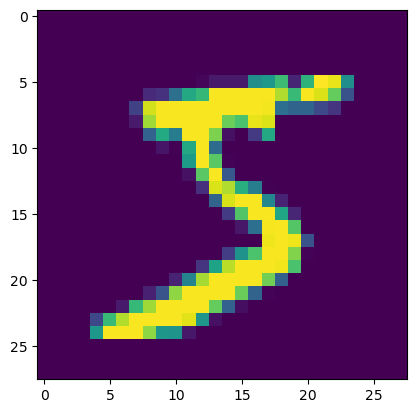

In [39]:
# looking a one scaled image

plt.imshow(X_train[0]);

In [40]:
# now for the last step we need to reshape the shape by adding a color scale since we are dealing with one color scale we add 1
# for color images such has RGB we add color scale 3

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
# images, width, height, color scale 1 for gray scale and 3 dimension for RGB

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [43]:
X_train.shape

(60000, 28, 28, 1)

In [44]:
X_test.shape

(10000, 28, 28, 1)

### Creating the Model and  Training the model

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

''' Why Use ReLU? (Simple Explanation)
1️⃣ Removes Negative Values

In images, negative pixel values don’t make sense.
ReLU converts all negative numbers to 0 (keeps only important info).
2️⃣ Avoids the "Vanishing Gradient" Problem

Older activations (like sigmoid) slow down learning because gradients shrink.
ReLU keeps gradients strong, so the model learns faster! 🚀
3️⃣ Keeps Important Patterns

ReLU doesn’t change positive values, so important features stay.
It helps CNN recognize edges, shapes, and textures better.
    
Mathematical Formula for ReLU
 

ReLU(x)=max(0,x)
If x > 0, it stays the same.
If x < 0, it becomes 0
'''

## Creating the model

In [53]:
model = Sequential()

# 1st layer should be convulation layer
# how to choose filters well it depends on the dataset the big the dataset more filters you add. mostly powers of 2 

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape= (28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# adding flatten of image

model.add(Flatten())

# adding a dense layer

model.add(Dense(units=128, activation='relu'))


# adding outplut layer
# fro multiclass classfication proble wee use activation function of Softmax
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\theed\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the model 

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [56]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9130 - loss: 0.2876 - val_accuracy: 0.9846 - val_loss: 0.0451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9856 - loss: 0.0462 - val_accuracy: 0.9866 - val_loss: 0.0386
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9870 - val_loss: 0.0406


# Evaluating the model.

In [57]:
metrics = pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.959183,0.135098,0.9846,0.045112
1,0.986050,0.044921,0.9866,0.038593
2,0.990733,0.028954,0.9884,0.034652
3,0.994017,0.018225,0.9870,0.040586


<Axes: >

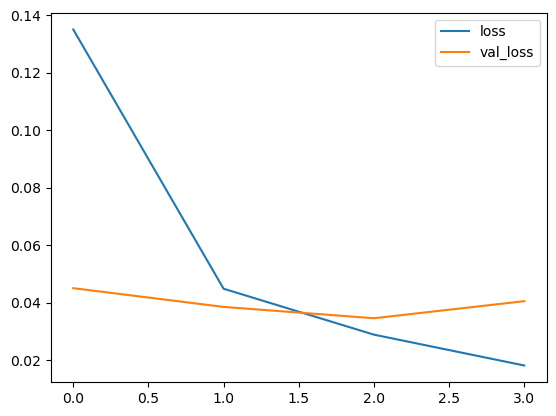

In [58]:
metrics[['loss','val_loss']].plot()

<Axes: >

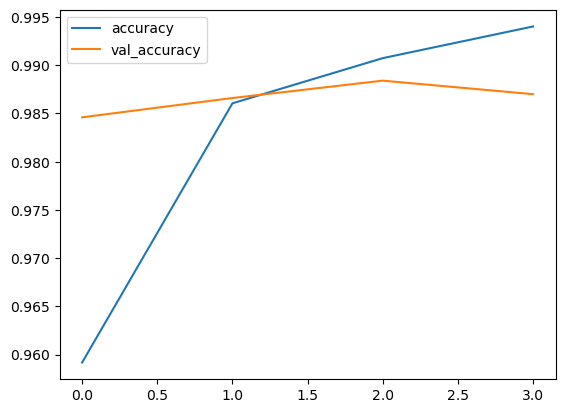

In [59]:
metrics[['accuracy','val_accuracy']].plot()

In [60]:
model.metrics_names

['loss', 'compile_metrics']

In [61]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.040585823357105255, 0.9869999885559082]

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.43440135e-10, 2.65320099e-09, 1.19895532e-07, ...,
        9.99989033e-01, 1.12987630e-09, 3.91953961e-07],
       [5.48083967e-10, 3.35454260e-08, 1.00000000e+00, ...,
        1.05358300e-11, 3.87883410e-13, 1.24502752e-16],
       [4.01560243e-07, 9.99984622e-01, 3.93581985e-07, ...,
        2.81237635e-06, 6.95695417e-06, 1.02891555e-07],
       ...,
       [5.85136431e-13, 1.36718858e-09, 8.57649780e-13, ...,
        8.00014490e-08, 1.77514679e-07, 1.58602404e-07],
       [1.50806242e-11, 1.18633120e-12, 6.42907735e-17, ...,
        2.64341223e-11, 3.57778376e-08, 4.80761153e-10],
       [1.58478173e-08, 2.56445032e-10, 4.14537027e-09, ...,
        1.77862865e-13, 1.45005083e-08, 2.77808072e-12]], dtype=float32)

In [75]:
y_pred_classes = predictions.argmax(axis=-1)

In [76]:
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [78]:
confusion_matrix(y_test, y_pred_classes)

array([[ 974,    0,    1,    1,    0,    1,    0,    0,    2,    1],
       [   1, 1128,    2,    1,    0,    1,    1,    0,    1,    0],
       [   0,    2, 1017,    4,    0,    0,    1,    8,    0,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    0,    2,    0],
       [   0,    0,    2,    0,  970,    0,    1,    0,    1,    8],
       [   1,    0,    1,   14,    0,  874,    2,    0,    0,    0],
       [   6,    2,    0,    1,    1,    4,  941,    0,    3,    0],
       [   1,    2,    6,    1,    0,    0,    0, 1015,    2,    1],
       [   5,    1,    5,    5,    0,    1,    0,    2,  953,    2],
       [   1,    2,    0,    6,    3,    1,    0,    4,    1,  991]],
      dtype=int64)

<Axes: >

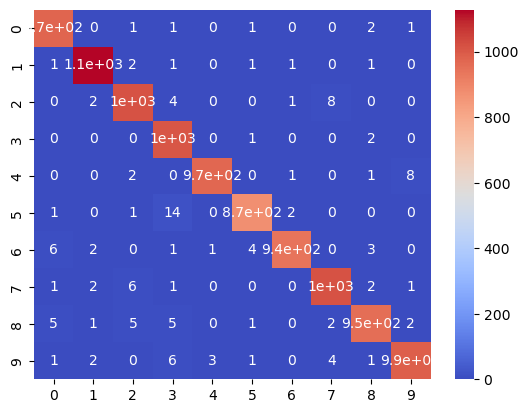

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot = True, cmap= 'coolwarm')

# Predictions

In [98]:
my_number = X_train[3]

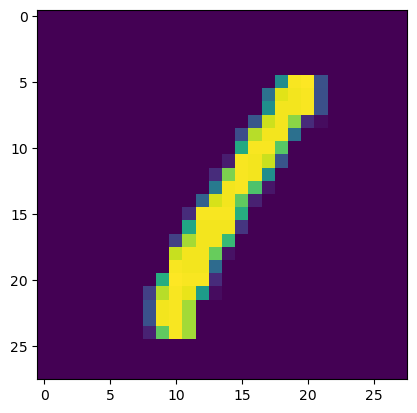

In [99]:
plt.imshow(my_number);

In [100]:
my_number.shape

(28, 28, 1)

In [101]:
# shape should be numof images, width, height, color
predict = model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [102]:
y_pred = predict.argmax(axis=-1)
y_pred

array([1], dtype=int64)